In [1009]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



%matplotlib inline

## Examining Data

In [1010]:
df = pd.read_csv("winequality-red.csv") #loading the dat<a by using panda library
df.head() #lets take a look how the csv file looks 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1011]:
df.info() #checking if there is any missing data for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

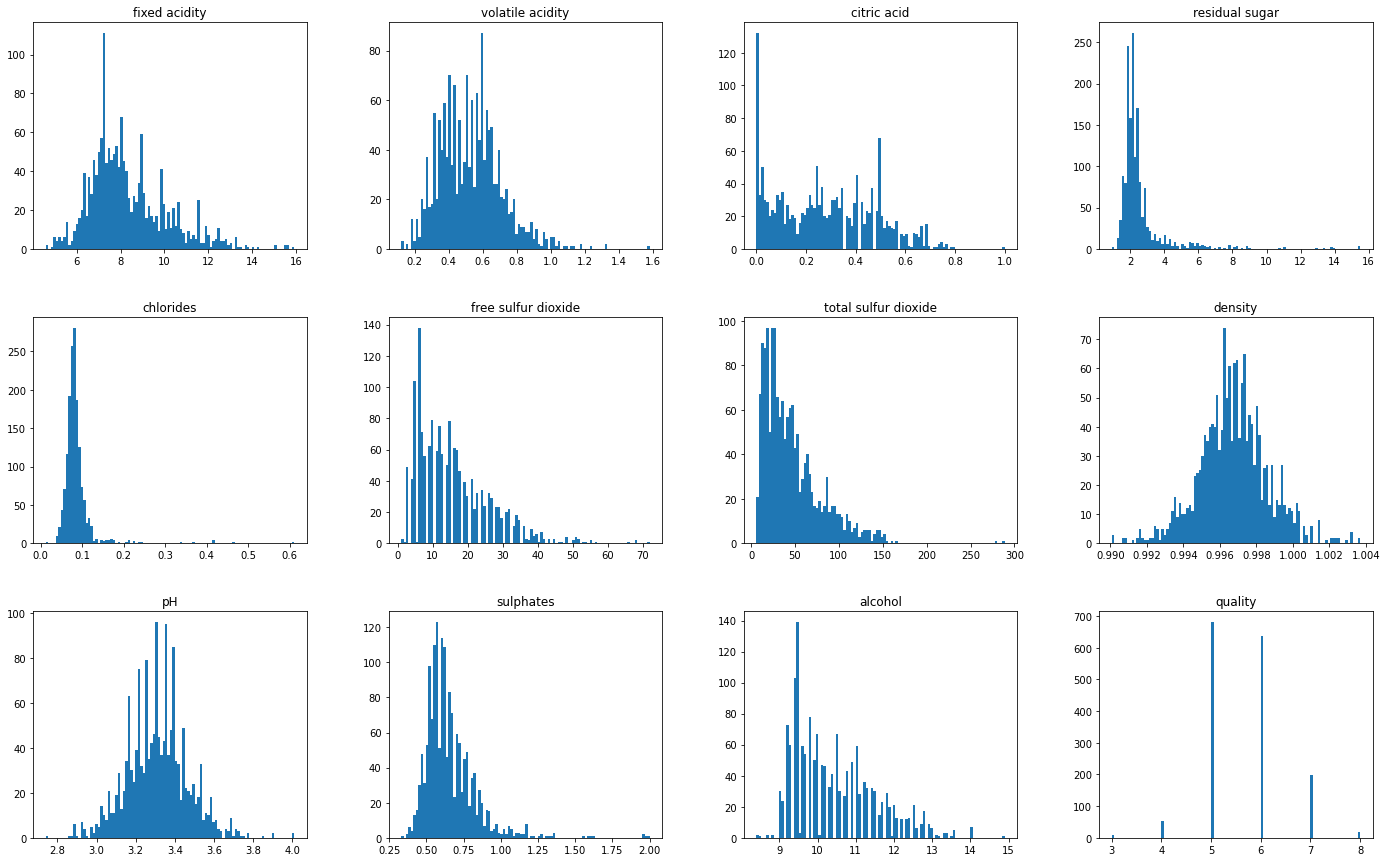

In [1012]:
df.hist(bins=100, figsize=(24,15), grid=False, layout=(3,4))

In [1013]:
df.corr() #to decide which parameter can be removed for better training. for this data residual sugar seems have no contribution to the quality and other parameters.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [1014]:
print(df["quality"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


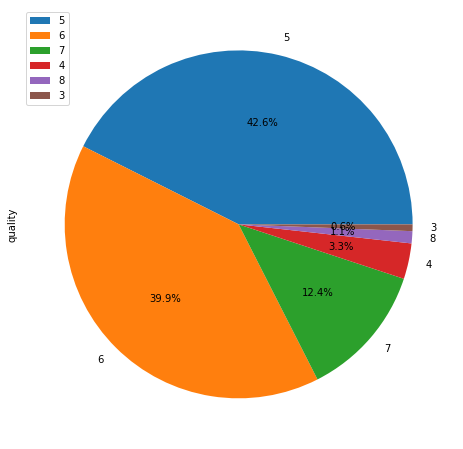

In [1015]:
plt.figure(1, figsize=(8,8)) #pie plot represantation of given quality points to the wines
df['quality'].value_counts().plot.pie(autopct="%.1f%%")
plt.legend()

In [1016]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Classifying

In [1017]:
area_of_interest=["residual sugar", "total sulfur dioxide", "fixed acidity",
                   "alcohol", "volatile acidity", "quality"]
df2=df[area_of_interest]

In [1018]:
condition1=(df2["quality"]==3)|(df2["quality"]==4)|(df2["quality"]==5) #classifying low quality and high quality wines by divinding two sub group
condition2=(df2["quality"]==6)|(df2["quality"]==7)|(df2["quality"]==8)
low_quality=round(df2[condition1].describe(),2)
high_quality=round(df2[condition2].describe(),2)

In [1019]:
interestarea=pd.concat([low_quality,high_quality], #merging average quality of 3,4,5 into cluster as low quality while average quality  of 6,7,8  is regarded as high quality
                    axis=1, 
                    keys=["Low Quality","High Quality"])
interestarea.T

count   mean    std   min    25%    50%  \
Low Quality  residual sugar        744.0   2.54   1.39  1.20   1.90   2.20   
             total sulfur dioxide  744.0  54.65  36.72  6.00  23.75  45.00   
             fixed acidity         744.0   8.14   1.57  4.60   7.10   7.80   
             alcohol               744.0   9.93   0.76  8.40   9.40   9.70   
             volatile acidity      744.0   0.59   0.18  0.18   0.46   0.59   
             quality               744.0   4.90   0.34  3.00   5.00   5.00   
High Quality residual sugar        855.0   2.54   1.42  0.90   1.90   2.20   
             total sulfur dioxide  855.0  39.35  27.25  6.00  20.00  33.00   
             fixed acidity         855.0   8.47   1.86  4.70   7.10   8.00   
             alcohol               855.0  10.86   1.11  8.40  10.00  10.80   
             volatile acidity      855.0   0.47   0.16  0.12   0.35   0.46   
             quality               855.0   6.27   0.49  6.00   6.00   6.00   

                                     75%     max  
Low Quality  residual sugar         2.60   15.50  
             total sulfur dioxide  78.00  155.00  
             fixed acidity          8.90   15.90  
             alcohol               10.30   14.90  
             volatile acidity       0.68    1.58  
             quality                5.00    5.00  
High Quality residual sugar         2.60   15.40  
             total sulfur dioxide  50.00  289.00  
             fixed acidity          9.65   15.60  
             alcohol               11.70   14.00  
             volatile acidity       0.58    1.04  
             quality                7.00    8.00

## Visual Represantation of Data

In [1020]:
#In order to plot 12 graphs at the same time, function is defined. 
def draw_multivarient_plot(df, rows, cols, plot_type):

    #Column names are saved as list
    column_names=df.columns.values
    #For counting column length and it will assign name and column numbers
    number_of_column=len(column_names)
    
    fig, axarr=plt.subplots(rows,cols, figsize=(24,15))

    counter=0 #In order to assign column name and graph. Once subplot is plotted, it will increase and it passes to next subplotting.
    for i in range(rows):
        for j in range(cols):
           
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=df, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

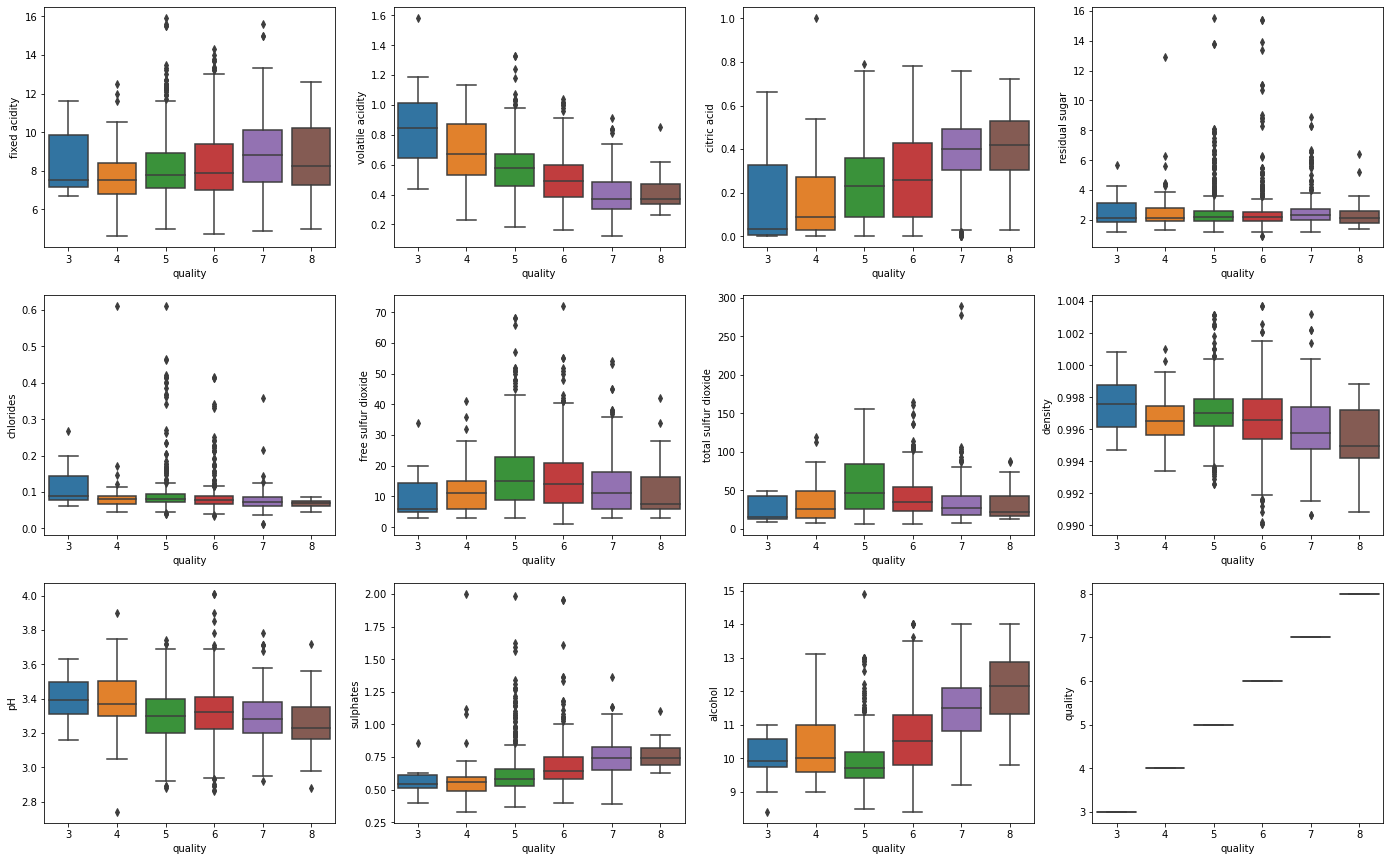

In [1021]:
draw_multivarient_plot(df,3,4,"box")
plt.savefig('box.jpg', bbox_inches='tight', transparent = 'False', dpi=300)

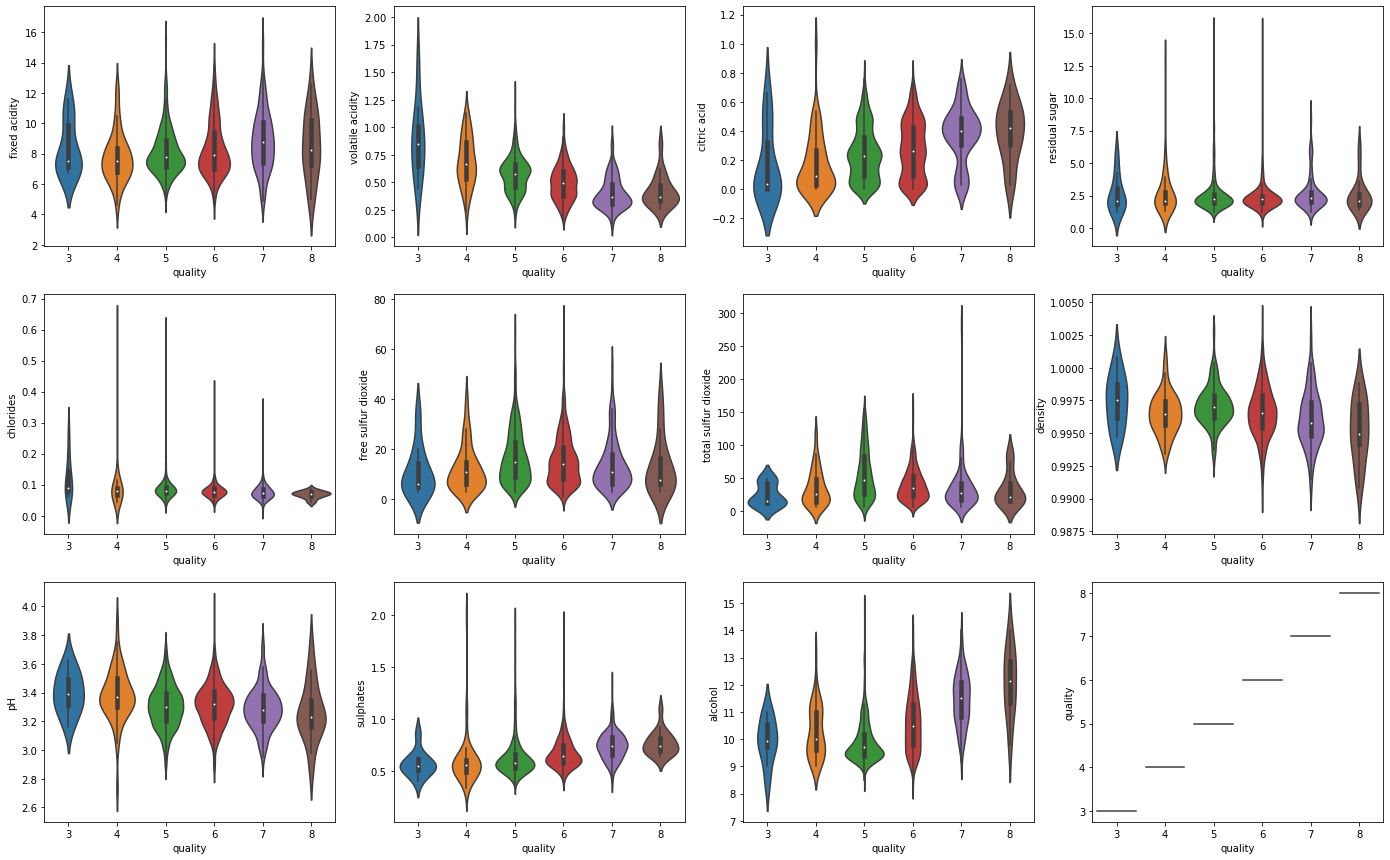

In [1022]:
draw_multivarient_plot(df,3,4,"violin")
plt.savefig('violin.jpg', bbox_inches='tight', transparent = 'False', dpi=300)

## Linear Supervised Machine Learning Determination

In [1023]:
def get_models(): #different linear supervised machine learning models
    models=[]
    models.append(("LR",LogisticRegression(max_iter=1000)))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    #models.append(("SVM linear",NaivelyCalibratedLinearSVC(C=1.0)))
    #models.append(("LDA", LinearDiscriminantAnalysis()))
    models.append(("RFC",RandomForestClassifier()))
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv): #returning cross validation scores for each model
    print("Cross validation values:".upper())
    models=get_models()


    results=[]
    names= []
    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22) #Provides train/test indices to split data in train/test sets.
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print(f"{name} cross validation has been conducted. Success rate is:{cv_result.mean():.2f}")

In [1024]:
df_temp=df.copy(deep=True) #creating deep copy
X=df.drop('quality', axis=1)
y=df['quality']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

CROSS VALIDATION VALUES:
LR cross validation has been conducted. Success rate is:0.60
NB cross validation has been conducted. Success rate is:0.55
KNN cross validation has been conducted. Success rate is:0.58
DT cross validation has been conducted. Success rate is:0.62
SVM rbf cross validation has been conducted. Success rate is:0.62
RFC cross validation has been conducted. Success rate is:0.70


In [1025]:
import numpy as np

from sklearn.svm import LinearSVC

class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba
    def max_iter(self, z):
        super().max_iter = 1500

In [1026]:
# Create classifiers
lr = LogisticRegression(max_iter=1500)
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
    (knn, "Closest Neighboor"),
    (dt, "Decision Tree")
]


C:\Users\Engin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


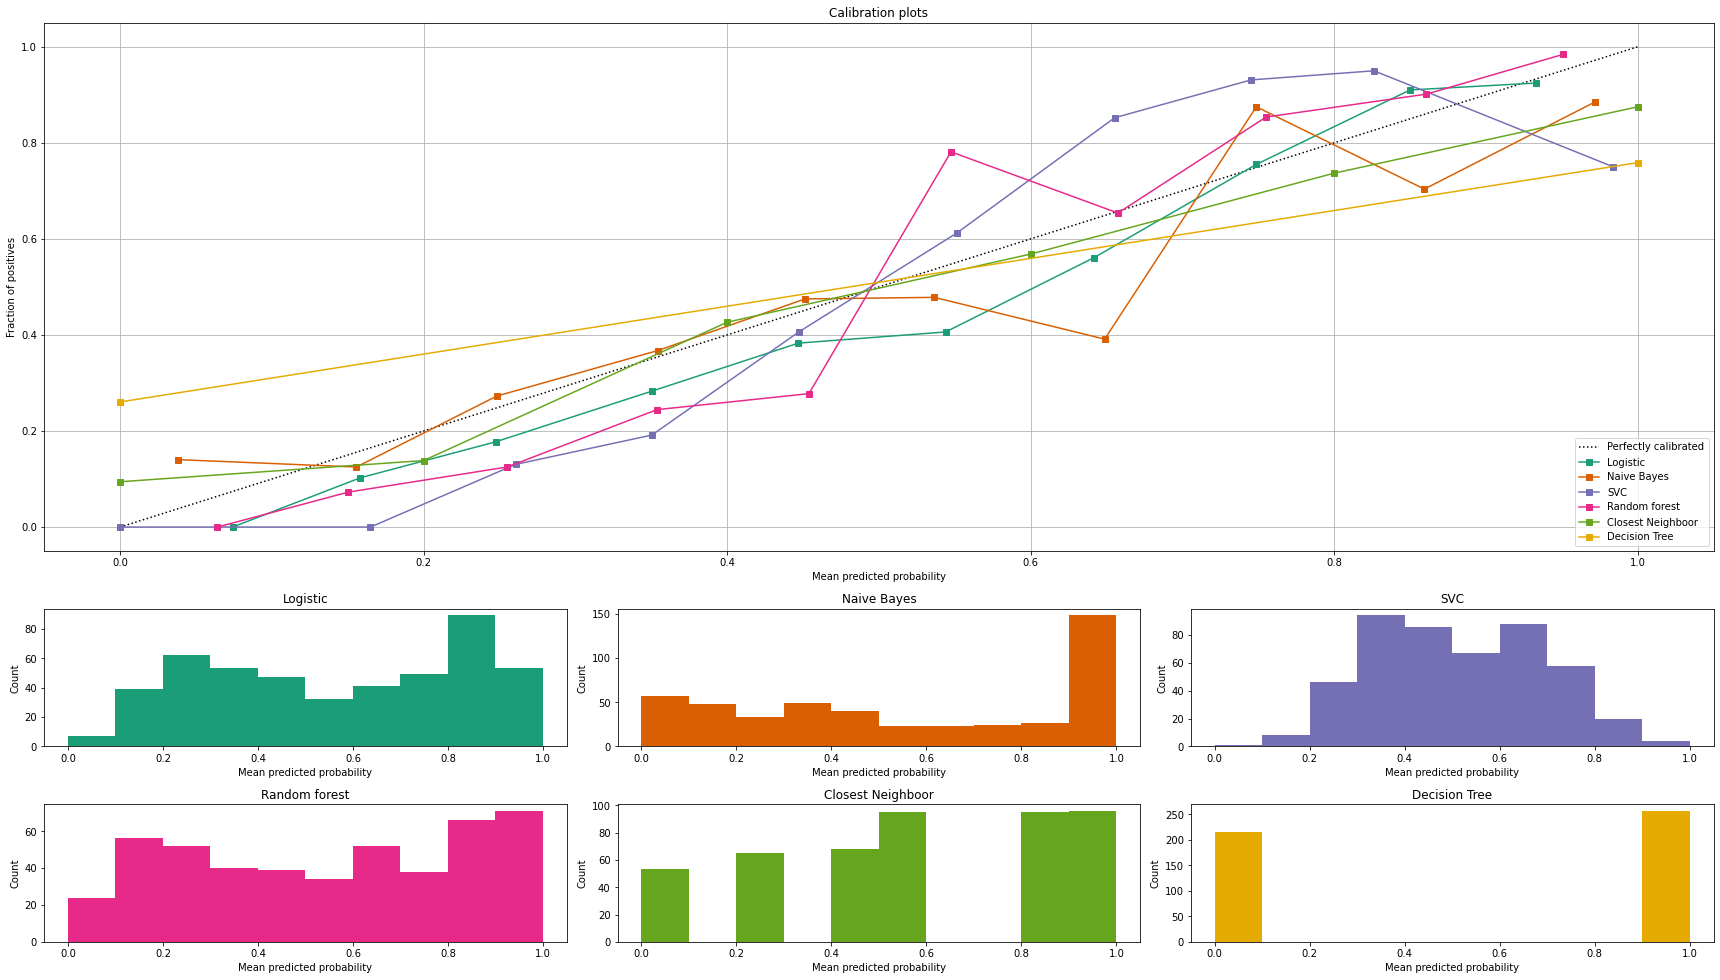

In [1027]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(24, 16))
gs = GridSpec(6, 3)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:3, :3])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train_temp, y_train_temp)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test_temp,
        y_test_temp,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(3, 0), (3, 1), (3, 2), (4, 0),(4,1),(4,2)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.savefig('calibrationplots.jpg', bbox_inches='tight', transparent = 'False', dpi=300)
plt.show()

## SVM_RBF Training vs Random Forest Training

In [1028]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=41) 
#The best results came from SVM rbf cross validation. So, we are going to illustrate the results accordingly
#Splitting data into two identical testing set and training set. Training data is the 70% of the all data.

<AxesSubplot:title={'center':'Training Data for corresponding quality level'}, xlabel='quality'>

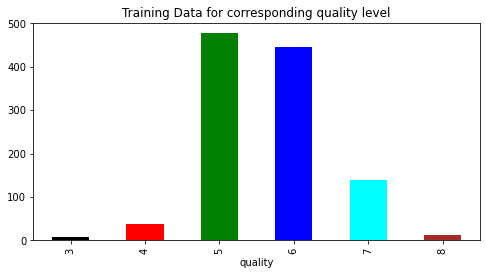

In [1029]:
y_frame=pd.DataFrame()
y_frame['quality']=y_train
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,4), color=['black', 'red', 'green', 'blue', 'cyan','brown'],
                                                     title="Training Data for corresponding quality level")

<AxesSubplot:title={'center':'Test Data for corresponding quality level'}, xlabel='quality'>

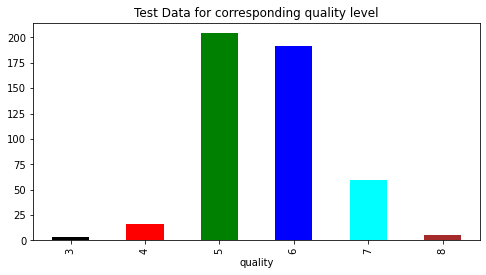

In [1030]:
y_frame=pd.DataFrame()
y_frame['quality']=y_test
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,4), color=['black', 'red', 'green', 'blue', 'cyan','brown'],
                                                     title="Test Data for corresponding quality level")

In [1031]:
#This data going to to do fitting for the data by changing gamma and Cs values with respect to wine quality
#It will assign best score and best C and gamme value at the end of fitting.
def SVM_GridSearch(X_train, X_test, y_train, y_test): 
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            model = SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            model.fit(X_train, y_train)
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))
    
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,predictions)
    
    fig, ax = plt.subplots(figsize=(12,8))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cividis)
    classNames = ['3','4','5','6','7','8']
    plt.title('Wine Quality Index')
    plt.ylabel('True label for Quality Index')
    plt.xlabel('Predicted label for Quality Index')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    for i in range(6):
        for j in range(6):
            plt.text(j,i, str(cm[i][j]),fontsize=8)
    plt.show()

In [1032]:
def RFC_GridSearch0(X_train, X_test, y_train, y_test):
    best_score=0
    n_estimatorss= np.linspace(100, 1500, num=5, dtype=int)
    #n_estimatorss=[1, 5, 10, 50, 100, 1000]
    sample_weights =[5,6,7,8]
    #sample_weights =[1,2,3,4,5,6,7,8,9,10]
    
    for n_estimators in n_estimatorss:
        for sample_weight in sample_weights:
            
            rdf=RandomForestClassifier(n_estimators=n_estimators)
            model = RandomForestClassifier(n_estimators=n_estimators)
            rdf.fit(X_train, y_train, sample_weight=sample_weight)
            model.fit(X_train, y_train)
            
            score=rdf.score(X_test, y_test)
            
            if score>best_score:
                y_pred=rdf.predict(X_test)
                best_score=score
                best_params={'n_estimator':n_estimators,"sample_weigt":sample_weight}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))
    

    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,predictions)
    
    fig, ax = plt.subplots(figsize=(12,8))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cividis)
    classNames = ['3','4','5','6','7','8']
    plt.title('Wine Quality Index')
    plt.ylabel('True label for Quality Index')
    plt.xlabel('Predicted label for Quality Index')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    for i in range(6):
        for j in range(6):
            plt.text(j,i, str(cm[i][j]),fontsize=8)
    plt.show()

best score: 0.6791666666666667
best params: {'C': 1, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.68      0.84      0.75       204
           6       0.67      0.70      0.69       192
           7       0.76      0.32      0.45        60
           8       0.00      0.00      0.00         5

    accuracy                           0.68       480
   macro avg       0.35      0.31      0.31       480
weighted avg       0.65      0.68      0.65       480



C:\Users\Engin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


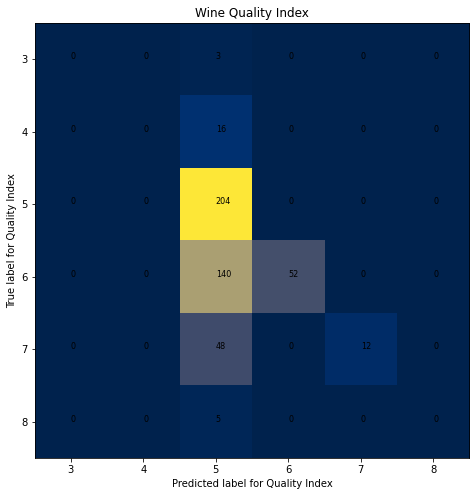

In [1033]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

best score: 0.7416666666666667
best params: {'n_estimator': 100, 'sample_weigt': 6}
classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.77      0.87      0.82       204
           6       0.71      0.77      0.74       192
           7       0.77      0.50      0.61        60
           8       0.00      0.00      0.00         5

    accuracy                           0.74       480
   macro avg       0.37      0.36      0.36       480
weighted avg       0.71      0.74      0.72       480



C:\Users\Engin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


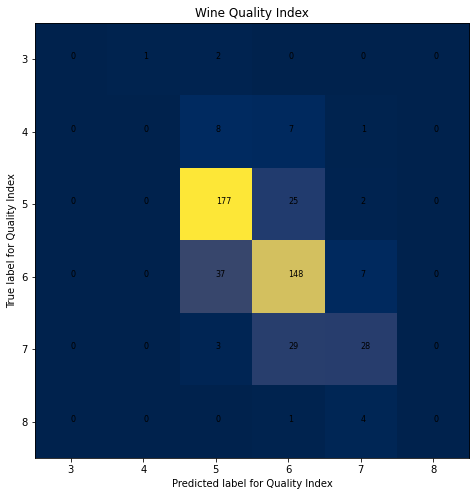

In [1034]:
RFC_GridSearch0(X_train, X_test, y_train, y_test)

## Two Quality Values for SVM_RBF

In [1035]:
df_temp.loc[(df_temp["quality"]==4),"quality"]=1
df_temp.loc[(df_temp["quality"]==5),"quality"]=1

df_temp.loc[(df_temp["quality"]==6),"quality"]=2
df_temp.loc[(df_temp["quality"]==7),"quality"]=2

df_temp = df_temp[df_temp.quality != 3]
df_temp = df_temp[df_temp.quality != 8]

In [1036]:
#draw_multivarient_plot(df_temp,4,3,"box")

In [1037]:
#draw_multivarient_plot(df_temp,4,3,"violin")

In [1038]:
X_temp=df_temp.drop('quality', axis=1)
y_temp=df_temp['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.3, random_state=41)

cross_validation_scores_for_various_ml_models(X_temp, y_temp)

CROSS VALIDATION VALUES:
LR cross validation has been conducted. Success rate is:0.74
NB cross validation has been conducted. Success rate is:0.72
KNN cross validation has been conducted. Success rate is:0.73
DT cross validation has been conducted. Success rate is:0.75
SVM rbf cross validation has been conducted. Success rate is:0.76
RFC cross validation has been conducted. Success rate is:0.82


In [1039]:
def SVM_GridSearch2(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            model = SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            model.fit(X_train, y_train)
            
            score=model.score(X_test, y_test)
            
            if score>best_score:
                y_pred=model.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))
    
    
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,predictions)
    
    fig, ax = plt.subplots(figsize=(12,8))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
    classNames = ['Low Quality','High Quality']
    plt.title('Wine Quality Index')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TL','FH'], ['FL', 'TH']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    

best score: 0.8241525423728814
best params: {'C': 1, 'gamma': 0.1}
classification reports:
               precision    recall  f1-score   support

           1       0.83      0.78      0.81       221
           2       0.82      0.86      0.84       251

    accuracy                           0.82       472
   macro avg       0.82      0.82      0.82       472
weighted avg       0.82      0.82      0.82       472



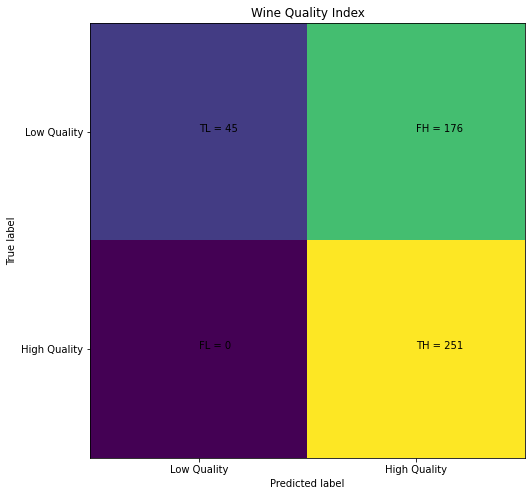

In [1040]:
SVM_GridSearch2(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

## Two Quality Values for Random Forest Classifier

In [1041]:
dt= pd.read_csv("winequality-red.csv")
dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1042]:
#dt = ds.drop(["residual sugar","pH","free sulfur dioxide"], axis=1)

In [1043]:
dt.loc[(dt["quality"]==4),"quality"]=1
dt.loc[(dt["quality"]==5),"quality"]=1
dt.loc[(dt["quality"]==6),"quality"]=2
dt.loc[(dt["quality"]==7),"quality"]=2

dt = dt[dt.quality != 3]
dt = dt[dt.quality != 8]

In [1044]:
X_dt=dt.drop('quality', axis=1)
y_dt=dt['quality']
X_dt=StandardScaler().fit_transform(X_dt)

X_train_dt, X_test_dt, y_train_dt, y_test_dt=train_test_split(X_dt, y_dt, stratify=y_dt, test_size=0.3, random_state=41)

In [1045]:
column_names=dt.columns.values
column_names

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [1046]:
feature_names = [f"{column_names[i]}" for i in range(X.shape[1])]
forest = RandomForestClassifier(n_estimators=700)
forest.fit(X_train_dt, y_train_dt)

RandomForestClassifier(n_estimators=700)

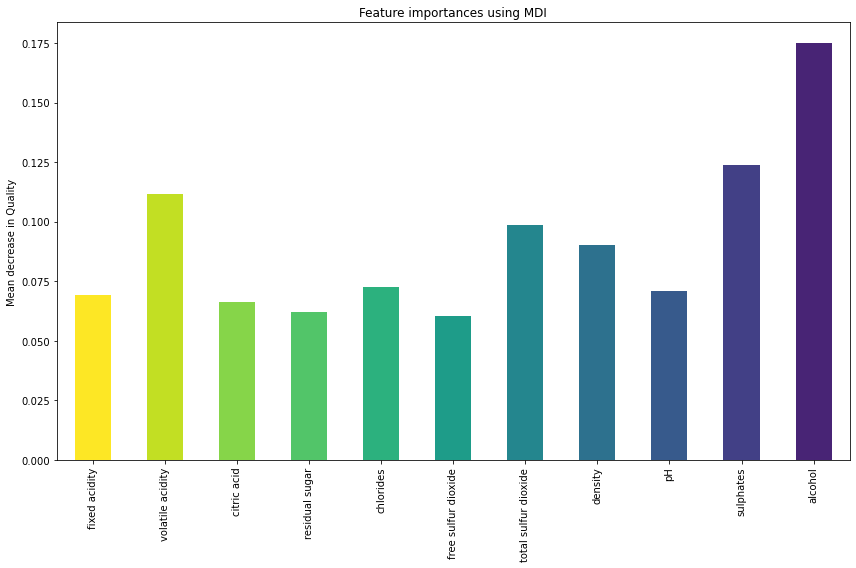

In [1047]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)
from matplotlib.cm import ScalarMappable

data_color = np.linspace(1,0.1,num=11)
data_color = [x / max(data_color) for x in data_color]

my_cmap = plt.cm.get_cmap('viridis')
colors = my_cmap(data_color)

#sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
#sm.set_array([])

fig, ax = plt.subplots(figsize=(12,8))
forest_importances.plot.bar(ax=ax, color=colors)#yerr=std,
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in Quality")
fig.tight_layout()
#ax.set_ylim(0,0.25)

In [1048]:
forest_importances.sort_values(ascending=False)

alcohol                 0.174883
sulphates               0.123618
volatile acidity        0.111440
total sulfur dioxide    0.098761
density                 0.090029
chlorides               0.072657
pH                      0.070856
fixed acidity           0.069076
citric acid             0.066415
residual sugar          0.061891
free sulfur dioxide     0.060375
dtype: float64

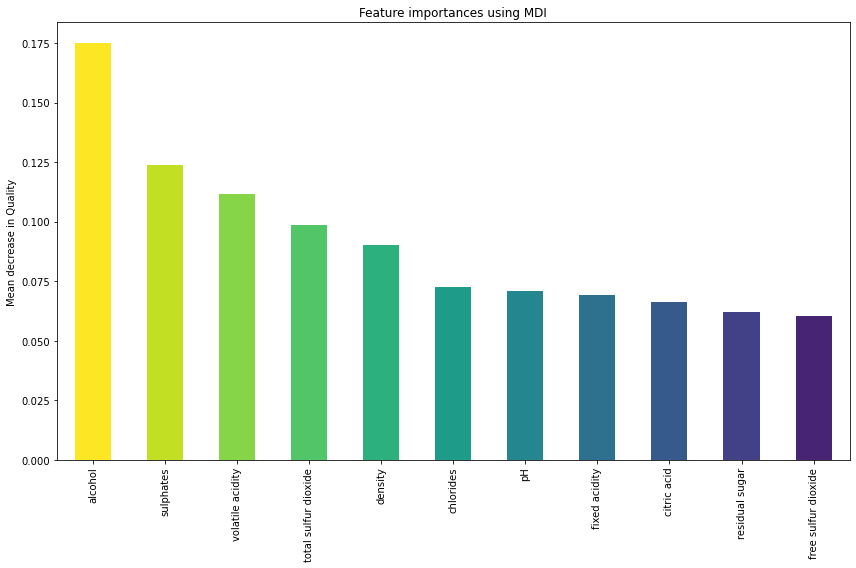

In [1049]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

#sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
#sm.set_array([])

fig, ax = plt.subplots(figsize=(12,8))
forest_importances_sorted.plot.bar(ax=ax, color=colors)#yerr=std,
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in Quality")
fig.tight_layout()
#ax.set_ylim(0,0.25

In [1050]:
X_dt=dt.drop('quality', axis=1)
y_dt=dt['quality']
X_dt=StandardScaler().fit_transform(X_dt)

X_train_dt, X_test_dt, y_train_dt, y_test_dt=train_test_split(X_dt, y_dt, stratify=y_dt, test_size=0.3, random_state=41)

In [1051]:
def RDF_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    n_estimatorss= np.linspace(100, 1500, num=15, dtype=int)
    #n_estimatorss=[1, 5, 10, 50, 100, 1000]
    sample_weights =[5,6,7,8]
    #sample_weights =[1,2,3,4,5,6,7,8,9,10]
    
    for n_estimators in n_estimatorss:
        for sample_weight in sample_weights:
            
            rdf=RandomForestClassifier(n_estimators=n_estimators)
            model = RandomForestClassifier(n_estimators=n_estimators)
            rdf.fit(X_train, y_train, sample_weight=sample_weight)
            model.fit(X_train, y_train)
            
            score=rdf.score(X_test, y_test)
            
            if score>best_score:
                y_pred=rdf.predict(X_test)
                best_score=score
                best_params={'n_estimator':n_estimators,"sample_weigt":sample_weight}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))
    
    
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,predictions)
    
        
    fig, ax = plt.subplots(figsize=(12,8))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
    classNames = ['Low Quality','High Quality']
    plt.title('Wine Quality Index')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TL','FH'], ['FL', 'TH']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

best score: 0.8516949152542372
best params: {'n_estimator': 1200, 'sample_weigt': 8}
classification reports:
               precision    recall  f1-score   support

           1       0.85      0.82      0.84       221
           2       0.85      0.88      0.86       251

    accuracy                           0.85       472
   macro avg       0.85      0.85      0.85       472
weighted avg       0.85      0.85      0.85       472



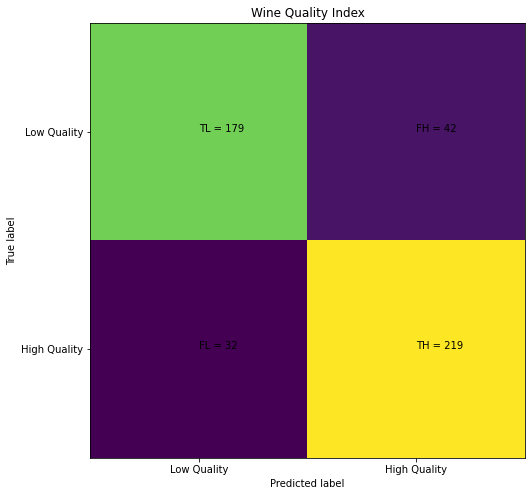

In [1052]:
RDF_GridSearch(X_train_dt, X_test_dt, y_train_dt, y_test_dt)